Epoch 1/100
2050/2050 - 5s - loss: 0.0121 - 5s/epoch - 2ms/step
Epoch 2/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 3/100
2050/2050 - 7s - loss: 0.0121 - 7s/epoch - 3ms/step
Epoch 4/100
2050/2050 - 6s - loss: 0.0121 - 6s/epoch - 3ms/step
Epoch 5/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 6/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 7/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 8/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 9/100
2050/2050 - 3s - loss: 0.0121 - 3s/epoch - 2ms/step
Epoch 10/100
2050/2050 - 3s - loss: 0.0120 - 3s/epoch - 2ms/step
Epoch 11/100
2050/2050 - 3s - loss: 0.0120 - 3s/epoch - 2ms/step
Epoch 12/100
2050/2050 - 4s - loss: 0.0120 - 4s/epoch - 2ms/step
Epoch 13/100
2050/2050 - 3s - loss: 0.0120 - 3s/epoch - 2ms/step
Epoch 14/100
2050/2050 - 3s - loss: 0.0120 - 3s/epoch - 2ms/step
Epoch 15/100
2050/2050 - 3s - loss: 0.0120 - 3s/epoch - 2ms/step
Epoch 16/100
2050/2050 - 3s - loss

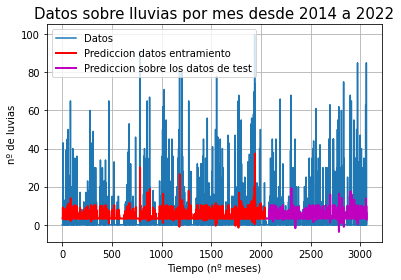

In [5]:
# LSTM  para predecir a los pasajeros de las aerolíneas internacionales con ventanas de regresion
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convertimos un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# semilla aleatoria para reproducibilidad
numpy.random.seed(7)

# cargamos el conjunto de datos
dataframe = read_csv('/content/drive/MyDrive/ProyectoFinalIA/datosllucia.csv', usecols=[1], engine='python',
skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# remodelamos X=t y Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# creamos la LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre lluvias por mes desde 2014 a 2022", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de luvias", fontsize = 10)
plt.show()

In [7]:
acc = history.history['loss']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: ignored